In [1]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import time

In [2]:
df = pd.read_excel("C:/Users/user/Downloads/미니프로젝트-쇼핑몰 실습데이터.xlsx")

In [3]:
df

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,NaN,NaN
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,[스마트 HBE*초도] 입체 액자형 현판,에이스디포,1,35000,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN
218597,221108104041264,에이스디포,[스마트 HBE*초도] 아크릴 사인,HB,1,26900,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN
218598,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,26900,신 + 포,2022-11-08 10:43:15,배송준비,N,NaN,NaN
218599,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,1,4050,포인트,2022-11-08 10:45:14,배송완료,N,NaN,NaN


In [4]:
df['결제방법'].unique()

array(['신용카드', '가상계좌', '후불', '무통장입금', nan, '신 + 포', '포인트', '신 + 적',
       '신 + 적 + 포', '적 + 포', '웰컴마일', '신 + 웰컴', '적립금', '후 + 포',
       '후 + 적 + 포', '후 + 적', '정 + 적', '정 + 적 + 포', '정기결제', '정 + 포',
       '현금간편결제', '현 + 포', '현 + 적', '현 + 적 + 포', '-', ' + 포'], dtype=object)

In [6]:
df = df.drop(['제작문구 내역', '할부기간'], axis='columns')

In [7]:
df

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N
...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,[스마트 HBE*초도] 입체 액자형 현판,에이스디포,1,35000,웰컴마일,2022-11-08 10:38:21,결제완료,Y
218597,221108104041264,에이스디포,[스마트 HBE*초도] 아크릴 사인,HB,1,26900,웰컴마일,2022-11-08 10:38:21,결제완료,Y
218598,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,26900,신 + 포,2022-11-08 10:43:15,배송준비,N
218599,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,1,4050,포인트,2022-11-08 10:45:14,배송완료,N


In [9]:
df2 = df.dropna()

In [10]:
df2['결제방법'].unique()

array(['신용카드', '가상계좌', '후불', '무통장입금', '신 + 포', '포인트', '신 + 적',
       '신 + 적 + 포', '적 + 포', '웰컴마일', '신 + 웰컴', '적립금', '후 + 포',
       '후 + 적 + 포', '후 + 적', '정 + 포', '정기결제', '정 + 적 + 포', '정 + 적',
       '현금간편결제', '현 + 포', '현 + 적', '현 + 적 + 포', '-'], dtype=object)

In [11]:
df2

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N
...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,[스마트 HBE*초도] 입체 액자형 현판,에이스디포,1,35000,웰컴마일,2022-11-08 10:38:21,결제완료,Y
218597,221108104041264,에이스디포,[스마트 HBE*초도] 아크릴 사인,HB,1,26900,웰컴마일,2022-11-08 10:38:21,결제완료,Y
218598,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,26900,신 + 포,2022-11-08 10:43:15,배송준비,N
218599,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,1,4050,포인트,2022-11-08 10:45:14,배송완료,N


In [17]:
df['결제방법'].unique()

array(['신용카드', '가상계좌', '후불', '무통장입금', nan, '신 + 포', '포인트', '신 + 적',
       '신 + 적 + 포', '적 + 포', '웰컴마일', '신 + 웰컴', '적립금', '후 + 포',
       '후 + 적 + 포', '후 + 적', '정 + 적', '정 + 적 + 포', '정기결제', '정 + 포',
       '현금간편결제', '현 + 포', '현 + 적', '현 + 적 + 포', '-', ' + 포'], dtype=object)

In [19]:
df

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N
...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,[스마트 HBE*초도] 입체 액자형 현판,에이스디포,1,35000,웰컴마일,2022-11-08 10:38:21,결제완료,Y
218597,221108104041264,에이스디포,[스마트 HBE*초도] 아크릴 사인,HB,1,26900,웰컴마일,2022-11-08 10:38:21,결제완료,Y
218598,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,26900,신 + 포,2022-11-08 10:43:15,배송준비,N
218599,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,1,4050,포인트,2022-11-08 10:45:14,배송완료,N


In [22]:
df = df.replace(np.nan, 'NAN')

In [23]:
df['결제방법'].unique()

array(['신용카드', '가상계좌', '후불', '무통장입금', 'NAN', '신 + 포', '포인트', '신 + 적',
       '신 + 적 + 포', '적 + 포', '웰컴마일', '신 + 웰컴', '적립금', '후 + 포',
       '후 + 적 + 포', '후 + 적', '정 + 적', '정 + 적 + 포', '정기결제', '정 + 포',
       '현금간편결제', '현 + 포', '현 + 적', '현 + 적 + 포', '-', ' + 포'], dtype=object)

In [38]:
df3 = df[df['결제방법'] != 'NAN']

In [39]:
df[df['결제방법'] == 'NAN']

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품
889,200107111249730,산스토어,[동원] 명절 식품 선물세트 + 동원 판호,NAN,1,0,NAN,2020-01-07 11:14:01,미결제,N
21272,200824085224365,오피스퀵,"[특가/무배] 무림 하이브라이트 A4 75g 1Box(2,500매입)",무림제지,1,0,NAN,2020-08-24 08:52:13,주문취소,N
23231,200916000227633,지니,[특가/무배] 국산/개별포장-보건용 마스크 KF94-대형 1갑 50개입,마스크공작소,1,0,NAN,2020-09-16 00:02:12,주문취소,N
23232,200916000518884,지니,[특가/무배] 국산/개별포장-보건용 마스크 KF94-대형 1갑 50개입,마스크공작소,1,0,NAN,2020-09-16 00:05:03,미결제,N
23233,200916000710623,지니,[특가/무배] 국산/개별포장-보건용 마스크 KF94-대형 1갑 50개입,마스크공작소,2,0,NAN,2020-09-16 00:06:56,미결제,N
23234,200916001131731,지니,[특가/무배] 국산/개별포장-보건용 마스크 KF94-대형 1갑 50개입,마스크공작소,1,0,NAN,2020-09-16 00:11:17,주문취소,N
25898,201021094955917,지니 태블릿,[스마트 HBM] 시범운영 가맹용 태블릿,삼성전자,1,396000,NAN,2020-10-21 09:49:34,미결제,N
25899,201021095006768,지니 태블릿,[스마트 HBM] 시범운영 가맹용 태블릿,삼성전자,1,396000,NAN,2020-10-21 09:49:44,미결제,N
25903,201021095053461,지니 태블릿,[스마트 HBM] 시범운영 가맹용 태블릿,삼성전자,1,396000,NAN,2020-10-21 09:50:31,미결제,N
25917,201021102148476,지니 태블릿,[스마트 HBM] 시범운영 가맹용 태블릿,삼성전자,5,1980000,NAN,2020-10-21 10:21:27,미결제,N


In [40]:
df3

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N
...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,[스마트 HBE*초도] 입체 액자형 현판,에이스디포,1,35000,웰컴마일,2022-11-08 10:38:21,결제완료,Y
218597,221108104041264,에이스디포,[스마트 HBE*초도] 아크릴 사인,HB,1,26900,웰컴마일,2022-11-08 10:38:21,결제완료,Y
218598,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,26900,신 + 포,2022-11-08 10:43:15,배송준비,N
218599,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,1,4050,포인트,2022-11-08 10:45:14,배송완료,N


In [41]:
df3[df3['결제방법'] == '-']

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품
79185,210810171820327,셀러테스트,상담형 미결제상품,NAN,1,990000,-,2021-08-10 17:16:54,상담취소,N
79186,210810171912358,셀러테스트,상담형 미결제상품,NAN,1,990000,-,2021-08-10 17:17:46,상담취소,N
79189,210810172251239,셀러테스트,상담형 미결제상품,NAN,1,990000,-,2021-08-10 17:21:24,상담취소,N
79218,210810184018476,셀러테스트,상담형 미결제상품,NAN,1,990000,-,2021-08-10 18:38:52,상담취소,N
80243,210817142016333,셀러테스트,상담형 미결제상품,NAN,1,990000,-,2021-08-17 14:18:48,상담취소,N
...,...,...,...,...,...,...,...,...,...,...
188021,220824142831557,리얼리티리테일코리아,[SKT] 임직원 특가-휴대폰 기기변경 특별 프로모션,삼성전자,1,356000,-,2022-08-24 14:26:21,상담취소,N
190522,220830100804705,리얼리티리테일코리아,[SKT] 임직원 특가-휴대폰 기기변경 특별 프로모션,삼성전자,1,356000,-,2022-08-30 10:05:53,상담취소,N
192104,220901212640646,리얼리티리테일코리아,[SKT]스마트해법 원장님 특가-휴대폰 기기변경 특별 프로모션,삼성전자,1,356000,-,2022-09-01 21:24:28,상담취소,N
204314,221006172829415,리얼리티리테일코리아,[SKT] 기변/선택약정-아이폰14 ProMax-5GX 프라임 플러스 요금제,애플,1,396000,-,2022-10-06 17:26:12,상담취소,N


In [42]:
df3 = df3[df3['결제방법'] != '-']

In [43]:
df3['결제방법'].unique()

array(['신용카드', '가상계좌', '후불', '무통장입금', '신 + 포', '포인트', '신 + 적',
       '신 + 적 + 포', '적 + 포', '웰컴마일', '신 + 웰컴', '적립금', '후 + 포',
       '후 + 적 + 포', '후 + 적', '정 + 적', '정 + 적 + 포', '정기결제', '정 + 포',
       '현금간편결제', '현 + 포', '현 + 적', '현 + 적 + 포', ' + 포'], dtype=object)

In [44]:
df3[df3['결제방법'] == ' + 포']

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품
174266,220716151056310,석빙고,[석빙고] 펜슬 아이스크림 (옵션선택),NAN,1,20500,+ 포,2022-07-16 15:08:47,구매확정,N
174267,220716151056310,석빙고,[석빙고] 펜슬 아이스크림 (옵션선택),NAN,1,20500,+ 포,2022-07-16 15:08:47,구매확정,N


In [45]:
df3['결제방법'] = df3['결제방법'].apply(lambda x: '신용카드' if x[0] == '신' else x)

C:\Users\user\AppData\Local\Temp\ipykernel_26400\3566200621.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['결제방법'] = df3['결제방법'].apply(lambda x: '신용카드' if x[0] == '신' else x)


In [46]:
df3

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N
...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,[스마트 HBE*초도] 입체 액자형 현판,에이스디포,1,35000,웰컴마일,2022-11-08 10:38:21,결제완료,Y
218597,221108104041264,에이스디포,[스마트 HBE*초도] 아크릴 사인,HB,1,26900,웰컴마일,2022-11-08 10:38:21,결제완료,Y
218598,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,26900,신용카드,2022-11-08 10:43:15,배송준비,N
218599,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,1,4050,포인트,2022-11-08 10:45:14,배송완료,N


In [47]:
df3['결제방법'] = df3['결제방법'].apply(lambda x: '후불' if x[0] == '후' else x)

C:\Users\user\AppData\Local\Temp\ipykernel_26400\2480722357.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['결제방법'] = df3['결제방법'].apply(lambda x: '후불' if x[0] == '후' else x)


In [48]:
df3['결제방법'].unique()

array(['신용카드', '가상계좌', '후불', '무통장입금', '포인트', '적 + 포', '웰컴마일', '적립금',
       '정 + 적', '정 + 적 + 포', '정기결제', '정 + 포', '현금간편결제', '현 + 포', '현 + 적',
       '현 + 적 + 포', ' + 포'], dtype=object)

In [49]:
df3['결제방법'] = df3['결제방법'].apply(lambda x: '현금간편결제' if x[0] == '현' else x)

C:\Users\user\AppData\Local\Temp\ipykernel_26400\1150619409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['결제방법'] = df3['결제방법'].apply(lambda x: '현금간편결제' if x[0] == '현' else x)


In [50]:
df3['결제방법'] = df3['결제방법'].apply(lambda x: '정기결제' if x[0] == '정' else x)

C:\Users\user\AppData\Local\Temp\ipykernel_26400\2273636416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['결제방법'] = df3['결제방법'].apply(lambda x: '정기결제' if x[0] == '정' else x)


In [51]:
df3['결제방법'].unique()

array(['신용카드', '가상계좌', '후불', '무통장입금', '포인트', '적 + 포', '웰컴마일', '적립금',
       '정기결제', '현금간편결제', ' + 포'], dtype=object)

In [53]:
' + 포'[0]

' '

In [52]:
df3['결제방법'] = df3['결제방법'].apply(lambda x: '적립금' if x[0] == '적' else x)

C:\Users\user\AppData\Local\Temp\ipykernel_26400\2879111740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['결제방법'] = df3['결제방법'].apply(lambda x: '적립금' if x[0] == '적' else x)


In [54]:
df3['결제방법'] = df3['결제방법'].apply(lambda x: '포인트' if x[0] == ' ' else x)

C:\Users\user\AppData\Local\Temp\ipykernel_26400\301491767.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['결제방법'] = df3['결제방법'].apply(lambda x: '포인트' if x[0] == ' ' else x)


In [55]:
df3['결제방법'].unique()

array(['신용카드', '가상계좌', '후불', '무통장입금', '포인트', '적립금', '웰컴마일', '정기결제',
       '현금간편결제'], dtype=object)

In [56]:
df3

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N
...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,[스마트 HBE*초도] 입체 액자형 현판,에이스디포,1,35000,웰컴마일,2022-11-08 10:38:21,결제완료,Y
218597,221108104041264,에이스디포,[스마트 HBE*초도] 아크릴 사인,HB,1,26900,웰컴마일,2022-11-08 10:38:21,결제완료,Y
218598,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,26900,신용카드,2022-11-08 10:43:15,배송준비,N
218599,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,1,4050,포인트,2022-11-08 10:45:14,배송완료,N


In [58]:
plt.rcParams['font.family'] = 'Malgun Gothic'

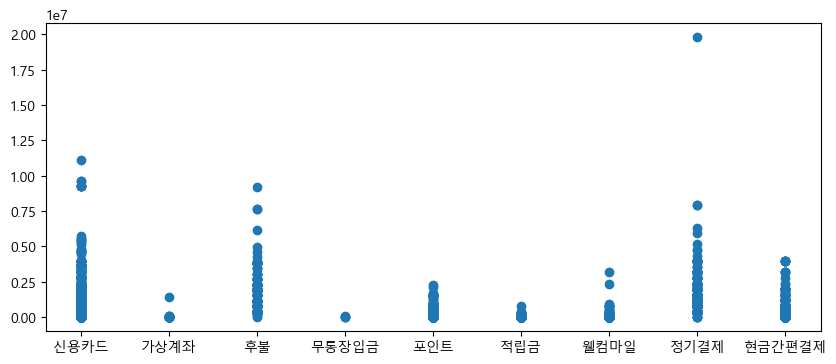

In [60]:
plt.figure(figsize=(10,4))
plt.scatter(df3['결제방법'], df3['판매금액'])
plt.show()